In [1]:
import os
import json
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from scipy import sparse

NOTEBOOK_DIR = Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent
# ACT_DIR = PROJECT_ROOT / "activations/Qwen_0.5B/model_layers_0_20250505_164739"
# META_DIR = ACT_DIR       

def load_and_pool(path):
    arr = np.load(path)
    if arr.ndim == 3 and arr.shape[0] == 1:
        arr = arr[0]          # (1, seq_len, dim) -> (seq_len, dim)
    return arr.mean(axis=0)  # (hidden_dim,)


In [2]:
def meta_data(ACT_DIR):
    features = []
    meta = []
    for npy in sorted(ACT_DIR.glob("activations_*.npy")):
        # Pool the activations
        arr = np.load(npy)
        if arr.ndim == 3 and arr.shape[0] == 1:
            arr = arr[0]
        feat = arr.mean(axis=0)
        features.append(feat)

        # load the corresponding json file
        idx = npy.stem.split("_")[1]           # '0', '1', etc.
        meta_path = ACT_DIR / f"meta_{idx}.json"
        info = json.loads(meta_path.read_text())
        info["file_name"]  = npy.name
        info["token_count"]= len(info.get("tokens", []))
        meta.append(info)

    X_pool  = np.vstack(features)             # (n_samples, hidden_dim)
    meta_df  = pd.DataFrame(meta)
    print("Loaded:", X_pool.shape, "and", meta_df.shape)
    return X_pool, meta_df

In [3]:
def plot_PCA(meta_df, pca):    
    plt.figure()
    cum_sum = np.cumsum(pca.explained_variance_ratio_)
    pcs = np.arange(1, len(cum_sum) + 1)
    plt.plot(pcs,cum_sum, marker="o")
    plt.xlabel("Number of PCs")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Combined PCA (activations + tokens)")
    plt.grid(True)
    plt.show()

    labels = meta_df['text'].tolist()

    plt.figure()
    sc = plt.scatter(meta_df["PC1"], meta_df["PC2"],
                    c=meta_df["token_count"], cmap="plasma", s=25)
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.title("PC1 vs PC2 (colored by token count)")
    plt.colorbar(sc, label="token_count")

    #uncomment the next part if you want to see the text but it will be chaotic and hard to read
    # for x, y, lbl in zip(meta_df["PC1"], meta_df["PC2"], labels):
    #     plt.text(x+0.02, y+0.02, lbl, fontsize=8, alpha=0.8)
    plt.show()

    print(meta_df[["file_name", "token_count", "PC1", "PC2"]])

Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


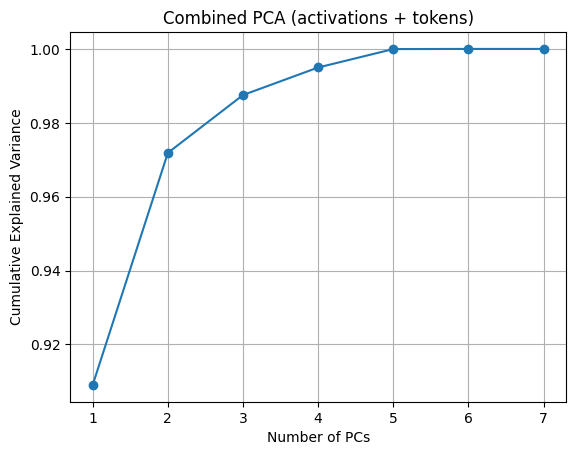

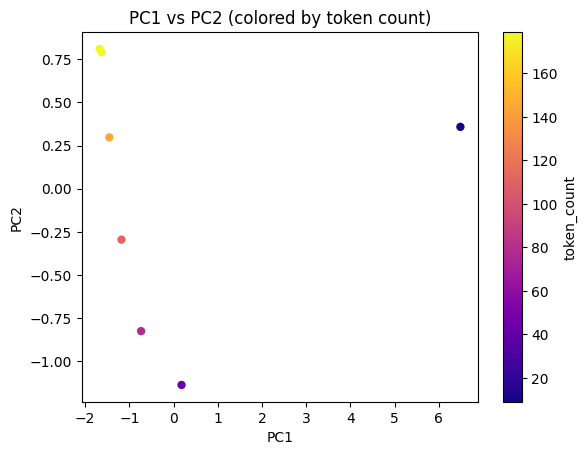

           file_name  token_count       PC1       PC2
0  activations_0.npy            9  6.486573  0.358643
1  activations_1.npy           43  0.179404 -1.137796
2  activations_2.npy           77 -0.734891 -0.825751
3  activations_3.npy          111 -1.178459 -0.295395
4  activations_4.npy          145 -1.452573  0.297575
5  activations_5.npy          179 -1.628497  0.792174
6  activations_6.npy          179 -1.671557  0.810550
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


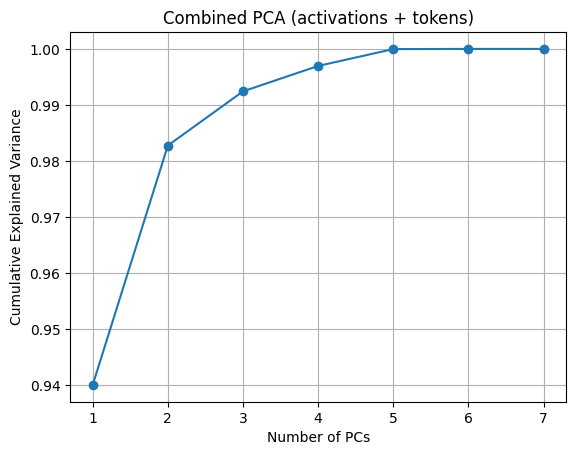

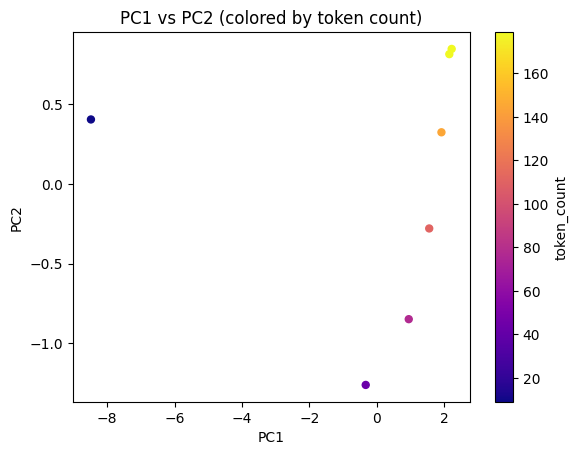

           file_name  token_count       PC1       PC2
0  activations_0.npy            9 -8.484331  0.403865
1  activations_1.npy           43 -0.326603 -1.259629
2  activations_2.npy           77  0.950858 -0.847597
3  activations_3.npy          111  1.558447 -0.279149
4  activations_4.npy          145  1.921447  0.323501
5  activations_5.npy          179  2.155258  0.813133
6  activations_6.npy          179  2.224925  0.845876
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


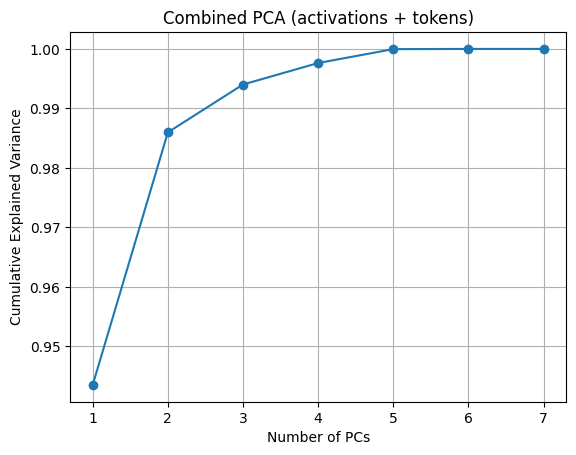

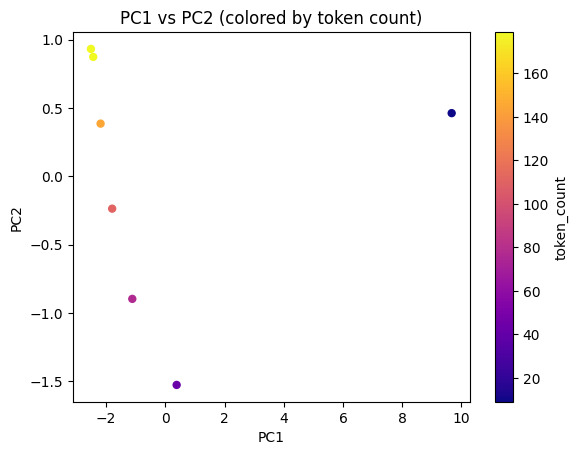

           file_name  token_count       PC1       PC2
0  activations_0.npy            9  9.672326  0.463095
1  activations_1.npy           43  0.381330 -1.525270
2  activations_2.npy           77 -1.117252 -0.895819
3  activations_3.npy          111 -1.796960 -0.235691
4  activations_4.npy          145 -2.188132  0.386424
5  activations_5.npy          179 -2.437190  0.874358
6  activations_6.npy          179 -2.514122  0.932902
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


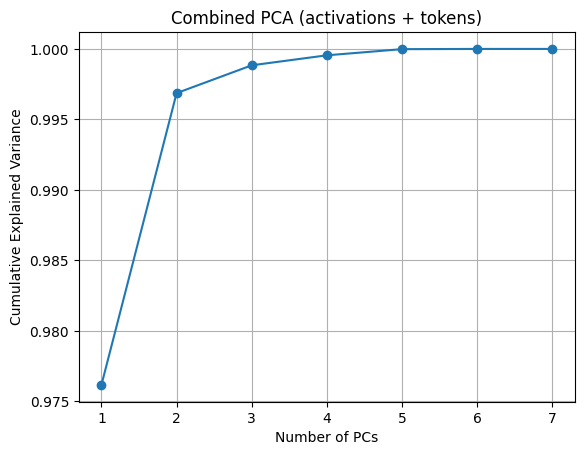

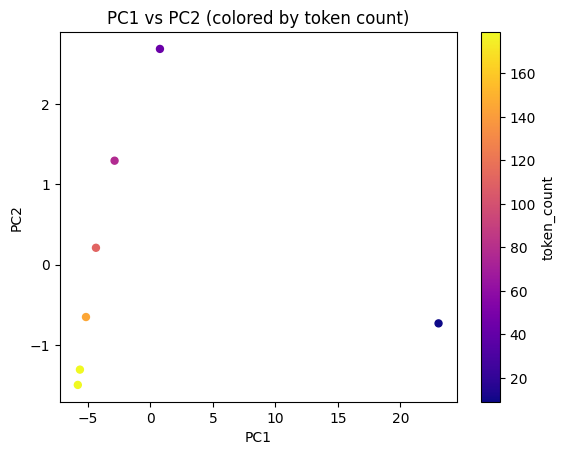

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  23.060291 -0.730720
1  activations_1.npy           43   0.764767  2.682761
2  activations_2.npy           77  -2.865943  1.292619
3  activations_3.npy          111  -4.356493  0.209354
4  activations_4.npy          145  -5.154881 -0.651809
5  activations_5.npy          179  -5.639381 -1.305900
6  activations_6.npy          179  -5.808360 -1.496306
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


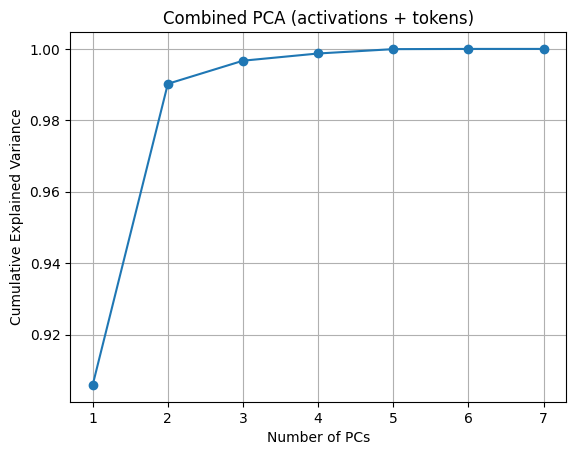

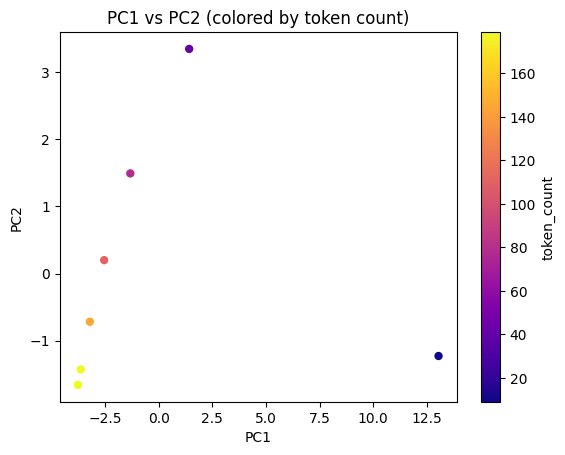

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  13.044361 -1.229407
1  activations_1.npy           43   1.422420  3.347494
2  activations_2.npy           77  -1.322199  1.491977
3  activations_3.npy          111  -2.538572  0.199263
4  activations_4.npy          145  -3.207535 -0.719120
5  activations_5.npy          179  -3.630867 -1.429548
6  activations_6.npy          179  -3.767608 -1.660659
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


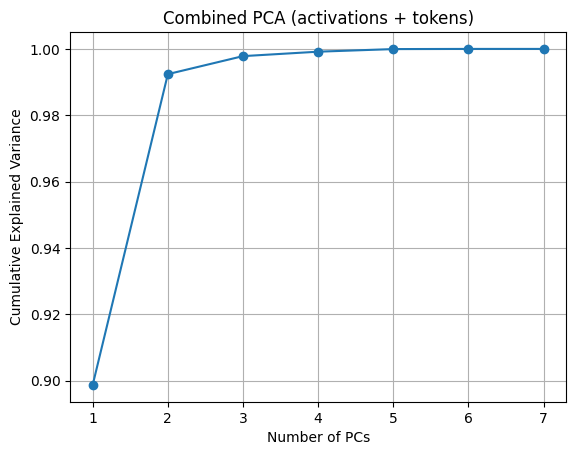

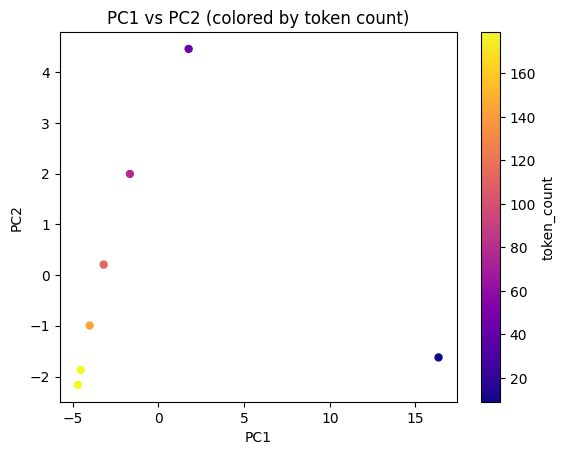

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  16.349360 -1.623395
1  activations_1.npy           43   1.762805  4.456110
2  activations_2.npy           77  -1.665576  1.992929
3  activations_3.npy          111  -3.195722  0.205710
4  activations_4.npy          145  -4.011371 -0.995721
5  activations_5.npy          179  -4.534605 -1.870009
6  activations_6.npy          179  -4.704891 -2.165624
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


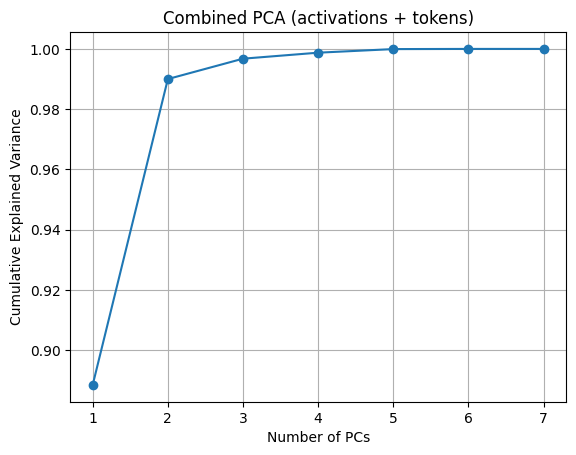

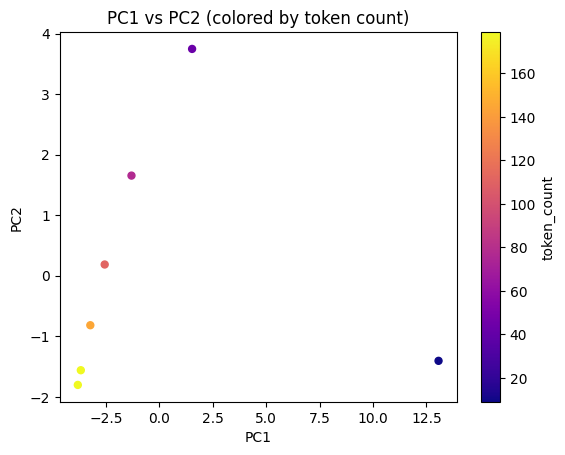

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  13.065215 -1.405427
1  activations_1.npy           43   1.530222  3.746596
2  activations_2.npy           77  -1.306622  1.654117
3  activations_3.npy          111  -2.560317  0.185771
4  activations_4.npy          145  -3.232963 -0.817283
5  activations_5.npy          179  -3.677240 -1.560461
6  activations_6.npy          179  -3.818294 -1.803313
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


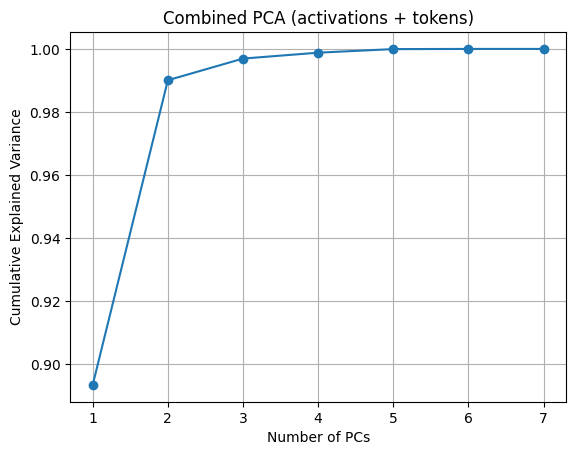

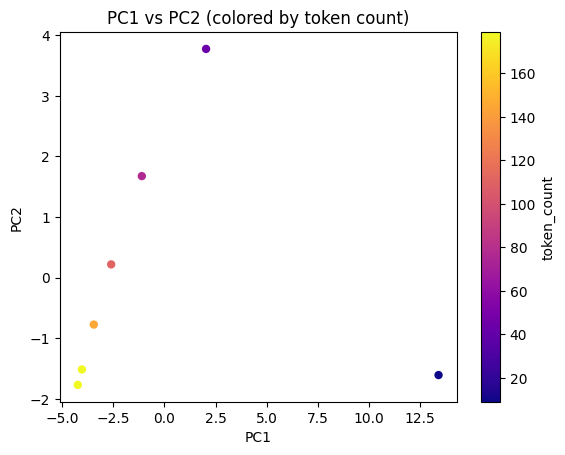

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  13.396503 -1.607610
1  activations_1.npy           43   2.034147  3.773606
2  activations_2.npy           77  -1.105644  1.675004
3  activations_3.npy          111  -2.603621  0.218415
4  activations_4.npy          145  -3.452685 -0.774061
5  activations_5.npy          179  -4.034330 -1.515099
6  activations_6.npy          179  -4.234369 -1.770255
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


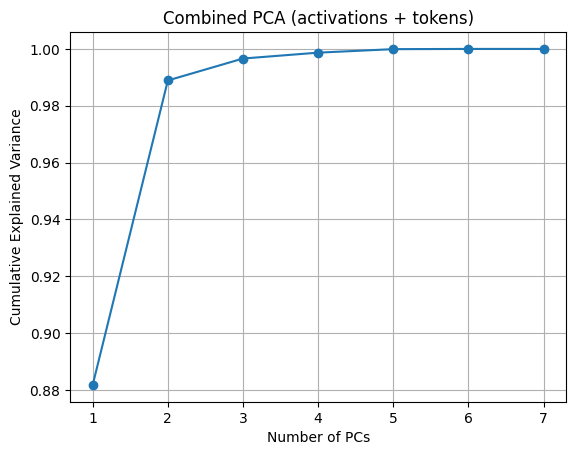

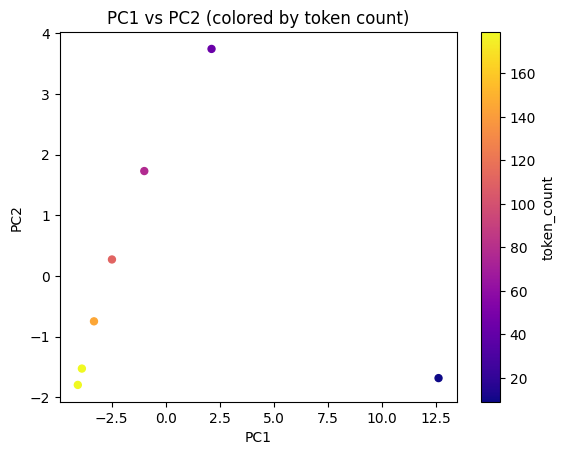

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  12.627848 -1.680527
1  activations_1.npy           43   2.120909  3.740494
2  activations_2.npy           77  -0.991578  1.729116
3  activations_3.npy          111  -2.488356  0.273095
4  activations_4.npy          145  -3.319814 -0.745659
5  activations_5.npy          179  -3.880459 -1.523611
6  activations_6.npy          179  -4.068548 -1.792909
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


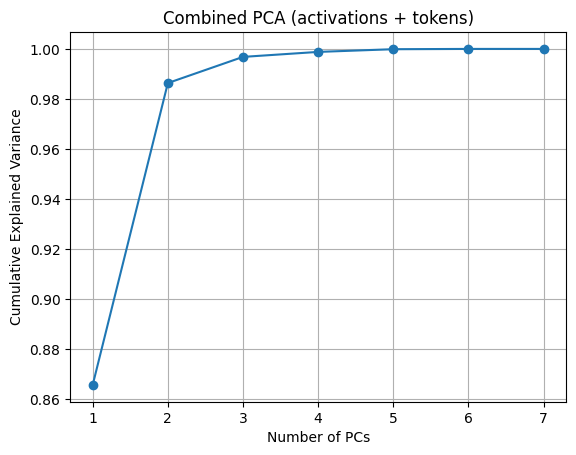

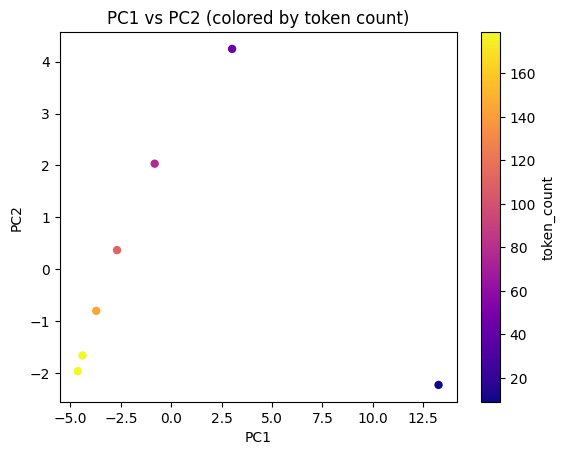

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  13.257684 -2.226753
1  activations_1.npy           43   3.017772  4.244915
2  activations_2.npy           77  -0.823846  2.034825
3  activations_3.npy          111  -2.692120  0.369641
4  activations_4.npy          145  -3.721179 -0.800857
5  activations_5.npy          179  -4.401961 -1.659793
6  activations_6.npy          179  -4.636351 -1.961977
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


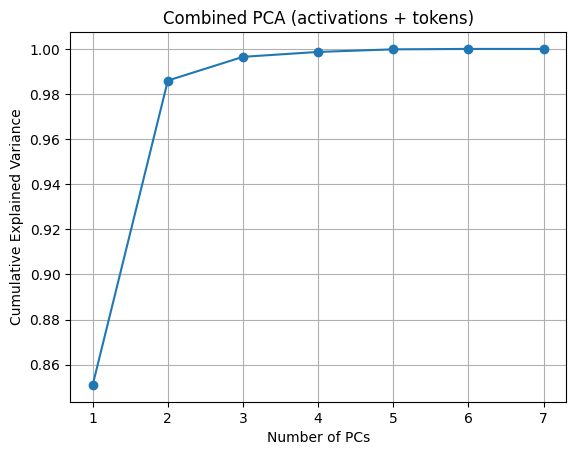

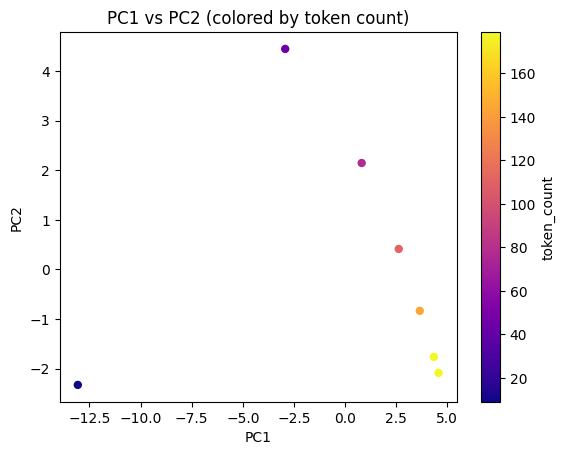

           file_name  token_count        PC1       PC2
0  activations_0.npy            9 -13.068158 -2.325131
1  activations_1.npy           43  -2.928230  4.442795
2  activations_2.npy           77   0.811326  2.144784
3  activations_3.npy          111   2.623159  0.413832
4  activations_4.npy          145   3.651472 -0.832552
5  activations_5.npy          179   4.341387 -1.760936
6  activations_6.npy          179   4.569044 -2.082792
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


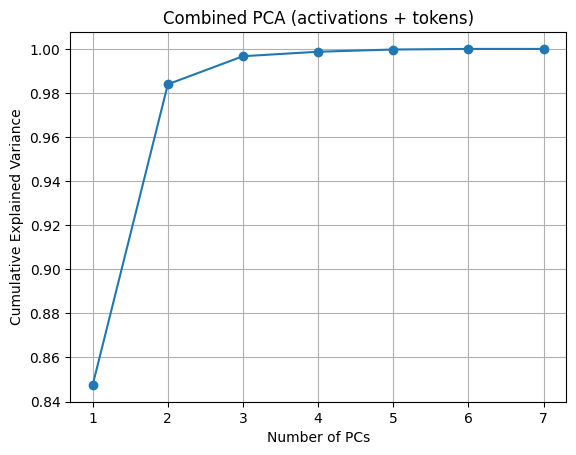

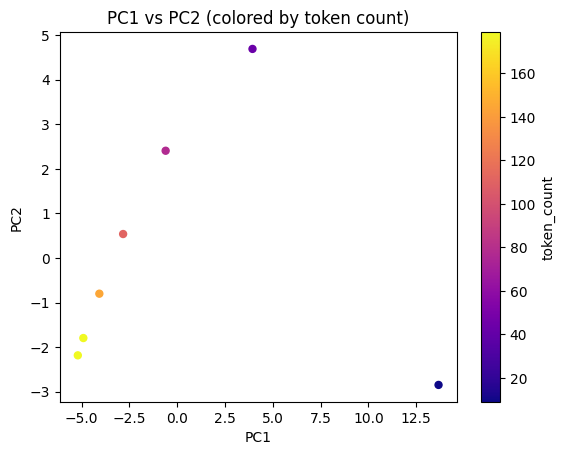

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  13.674137 -2.849076
1  activations_1.npy           43   3.940168  4.690491
2  activations_2.npy           77  -0.604049  2.405774
3  activations_3.npy          111  -2.829116  0.536965
4  activations_4.npy          145  -4.072540 -0.801739
5  activations_5.npy          179  -4.909454 -1.797079
6  activations_6.npy          179  -5.199147 -2.185336
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


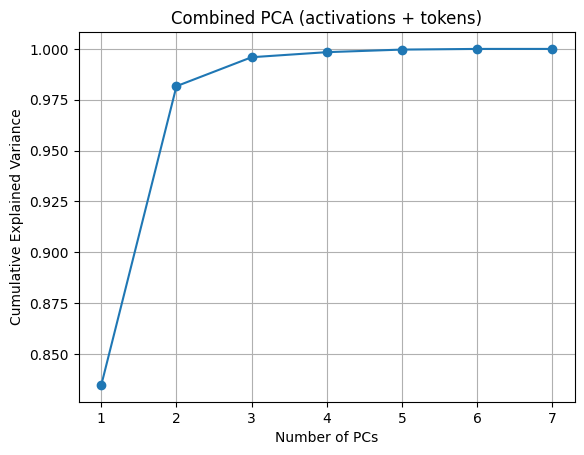

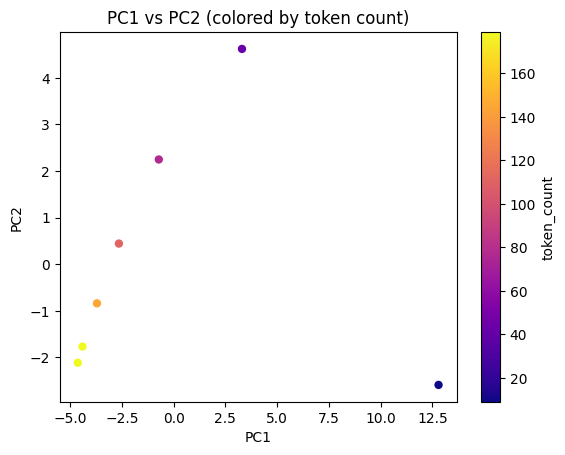

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  12.794700 -2.591103
1  activations_1.npy           43   3.300824  4.621496
2  activations_2.npy           77  -0.716949  2.248283
3  activations_3.npy          111  -2.643395  0.443267
4  activations_4.npy          145  -3.702604 -0.839866
5  activations_5.npy          179  -4.403981 -1.767422
6  activations_6.npy          179  -4.628595 -2.114654
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


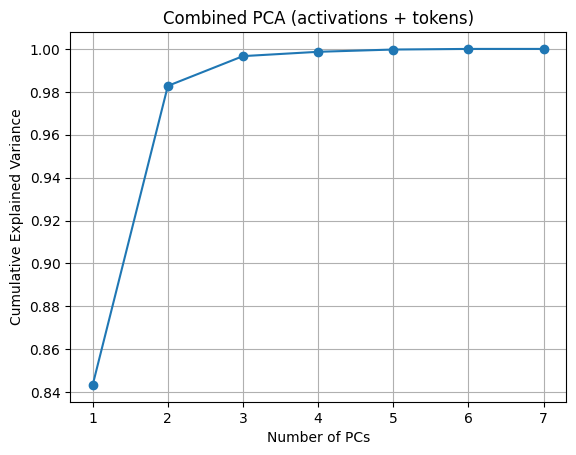

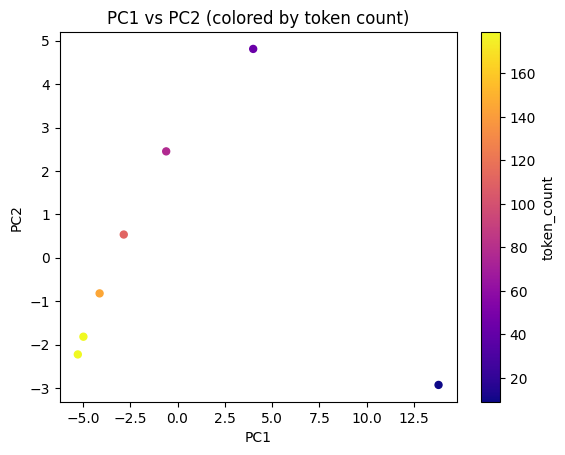

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  13.794424 -2.929451
1  activations_1.npy           43   3.999582  4.810630
2  activations_2.npy           77  -0.598003  2.450661
3  activations_3.npy          111  -2.839757  0.534953
4  activations_4.npy          145  -4.116475 -0.820862
5  activations_5.npy          179  -4.971846 -1.818772
6  activations_6.npy          179  -5.267924 -2.227159
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


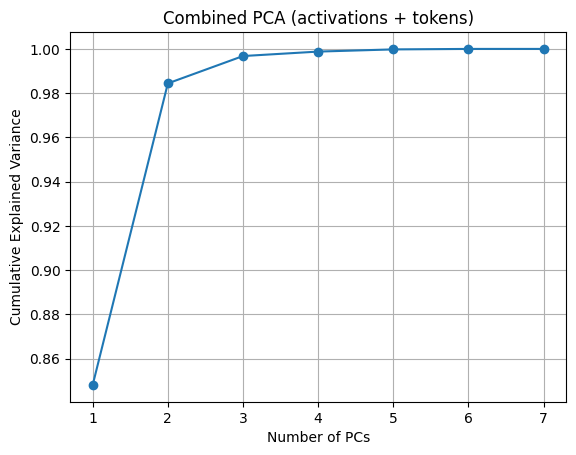

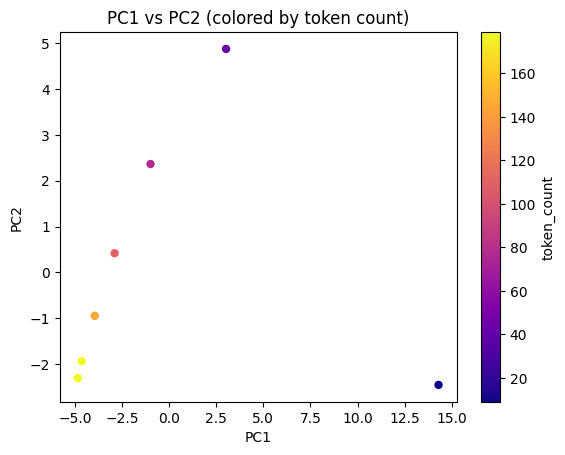

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  14.301870 -2.458264
1  activations_1.npy           43   3.023700  4.876696
2  activations_2.npy           77  -0.989106  2.364027
3  activations_3.npy          111  -2.895037  0.416688
4  activations_4.npy          145  -3.949779 -0.948940
5  activations_5.npy          179  -4.642791 -1.941305
6  activations_6.npy          179  -4.848858 -2.308901
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


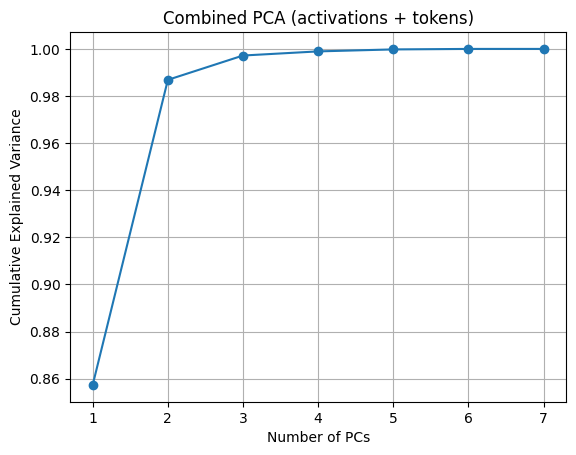

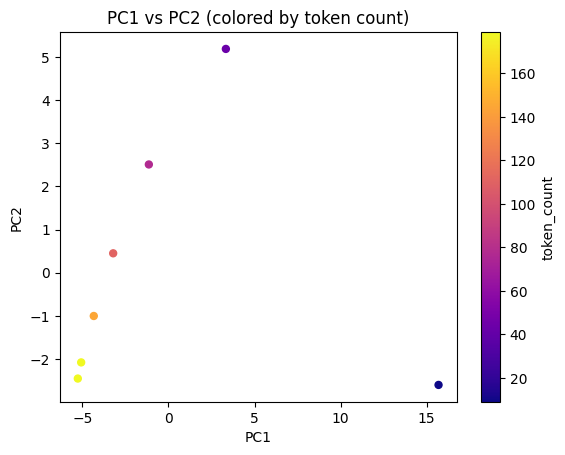

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  15.685452 -2.602117
1  activations_1.npy           43   3.334389  5.185297
2  activations_2.npy           77  -1.138946  2.507393
3  activations_3.npy          111  -3.210635  0.448294
4  activations_4.npy          145  -4.336823 -1.004469
5  activations_5.npy          179  -5.069145 -2.080051
6  activations_6.npy          179  -5.264293 -2.454346
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


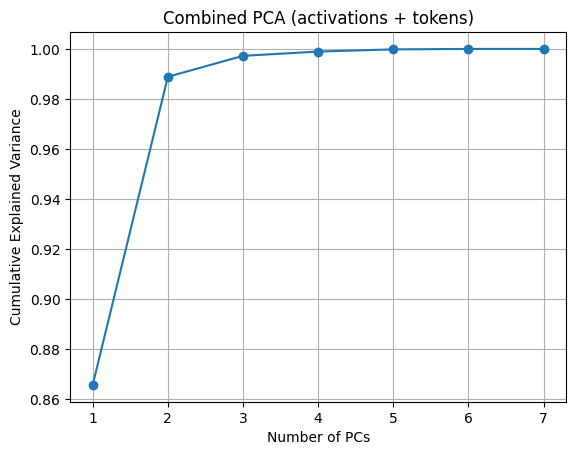

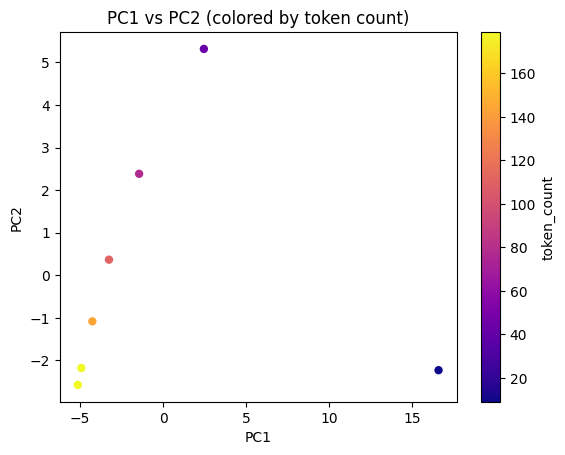

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  16.584638 -2.230724
1  activations_1.npy           43   2.453071  5.318347
2  activations_2.npy           77  -1.446214  2.383814
3  activations_3.npy          111  -3.261710  0.366670
4  activations_4.npy          145  -4.263343 -1.082429
5  activations_5.npy          179  -4.928207 -2.178833
6  activations_6.npy          179  -5.138235 -2.576844
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


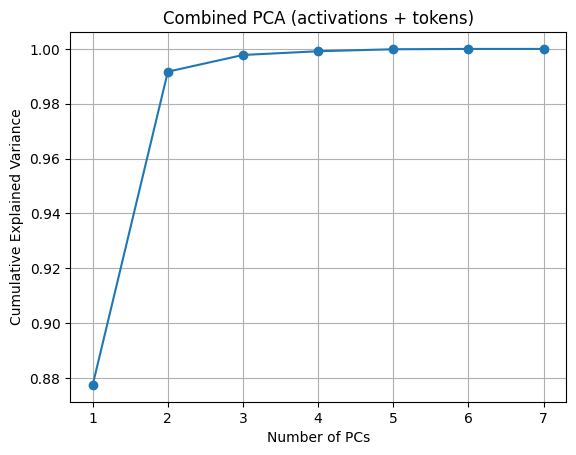

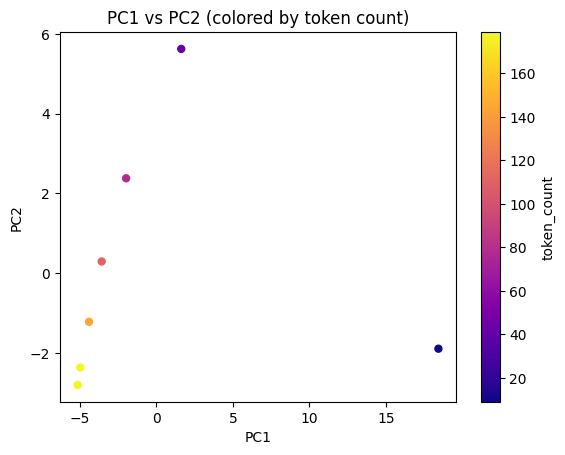

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  18.429077 -1.896459
1  activations_1.npy           43   1.625602  5.621736
2  activations_2.npy           77  -1.975844  2.376968
3  activations_3.npy          111  -3.573097  0.291183
4  activations_4.npy          145  -4.398269 -1.221309
5  activations_5.npy          179  -4.966761 -2.367286
6  activations_6.npy          179  -5.140708 -2.804833
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


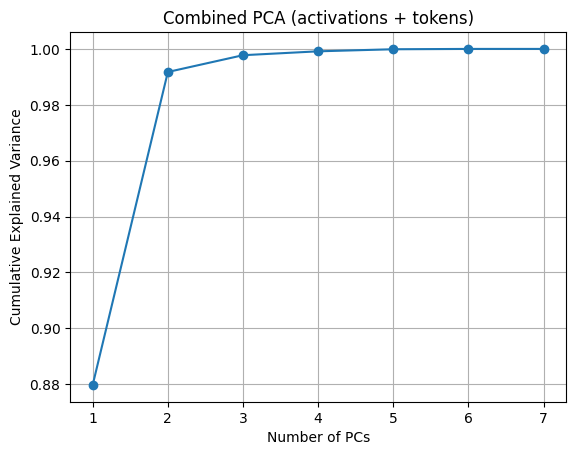

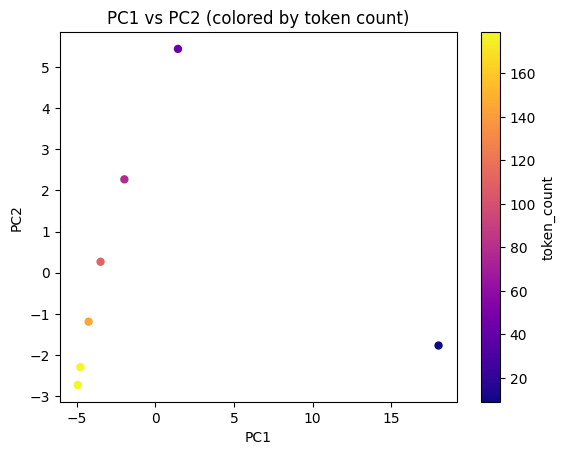

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  18.011711 -1.766517
1  activations_1.npy           43   1.432157  5.433815
2  activations_2.npy           77  -1.977254  2.267393
3  activations_3.npy          111  -3.493960  0.266623
4  activations_4.npy          145  -4.253606 -1.187465
5  activations_5.npy          179  -4.779118 -2.290744
6  activations_6.npy          179  -4.939930 -2.723106
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


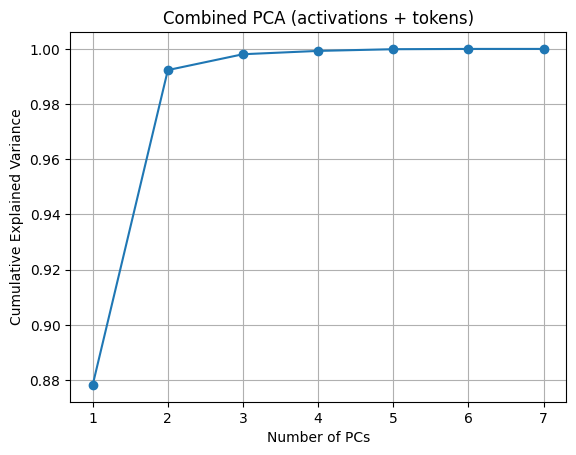

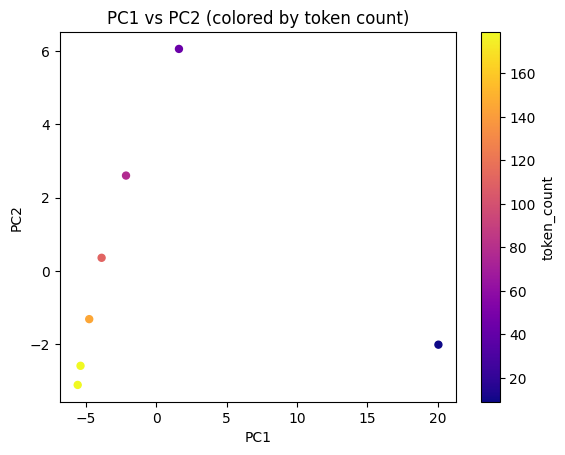

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  20.042074 -2.011122
1  activations_1.npy           43   1.624858  6.058807
2  activations_2.npy           77  -2.132472  2.603162
3  activations_3.npy          111  -3.865290  0.359575
4  activations_4.npy          145  -4.743967 -1.313867
5  activations_5.npy          179  -5.362128 -2.587398
6  activations_6.npy          179  -5.563076 -3.109158
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


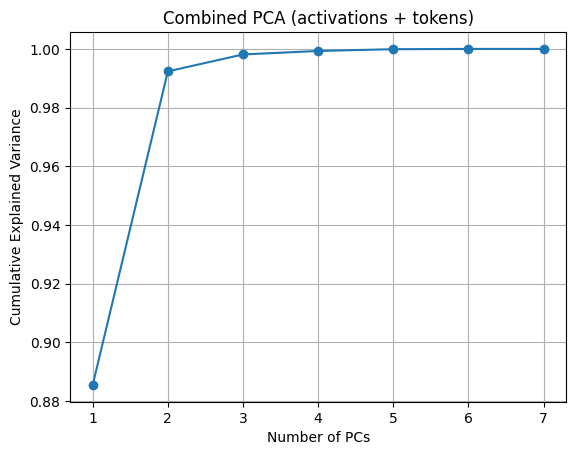

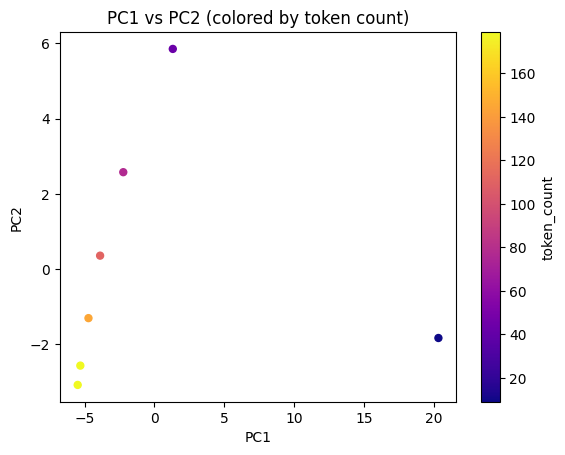

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  20.306112 -1.832372
1  activations_1.npy           43   1.312334  5.851227
2  activations_2.npy           77  -2.228540  2.574804
3  activations_3.npy          111  -3.885441  0.356477
4  activations_4.npy          145  -4.717291 -1.304293
5  activations_5.npy          179  -5.298842 -2.566236
6  activations_6.npy          179  -5.488333 -3.079607
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


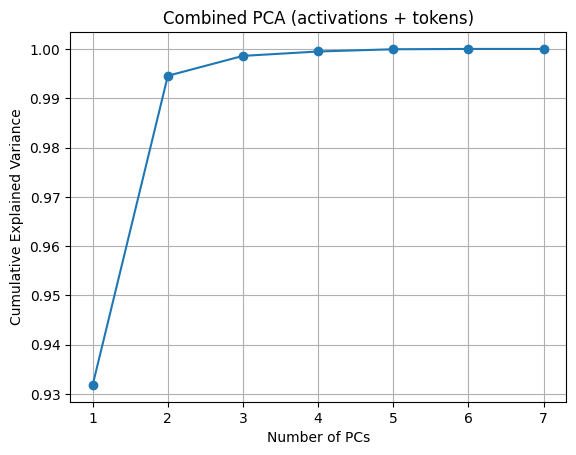

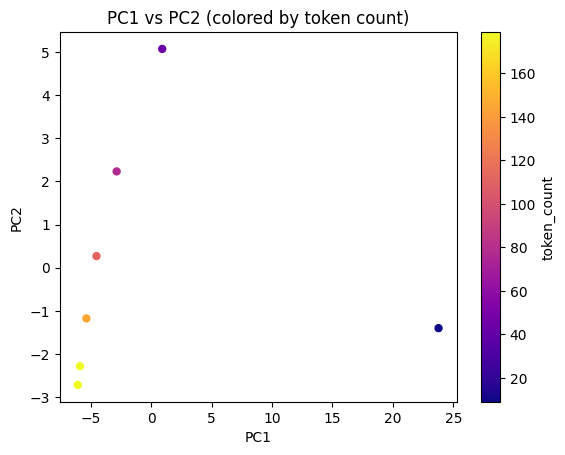

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  23.775471 -1.400036
1  activations_1.npy           43   0.915894  5.074033
2  activations_2.npy           77  -2.856157  2.233860
3  activations_3.npy          111  -4.522710  0.269942
4  activations_4.npy          145  -5.355330 -1.175420
5  activations_5.npy          179  -5.889458 -2.285410
6  activations_6.npy          179  -6.067711 -2.716969
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


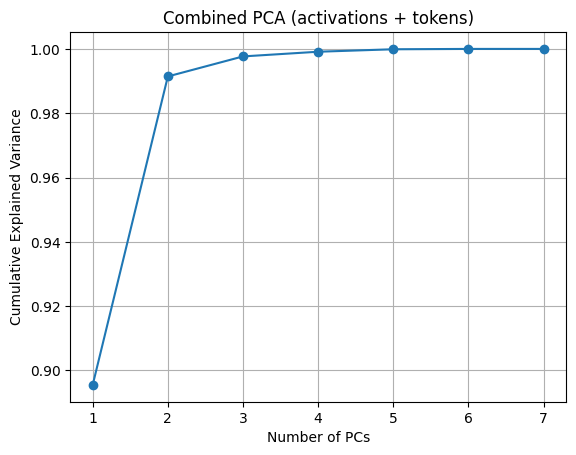

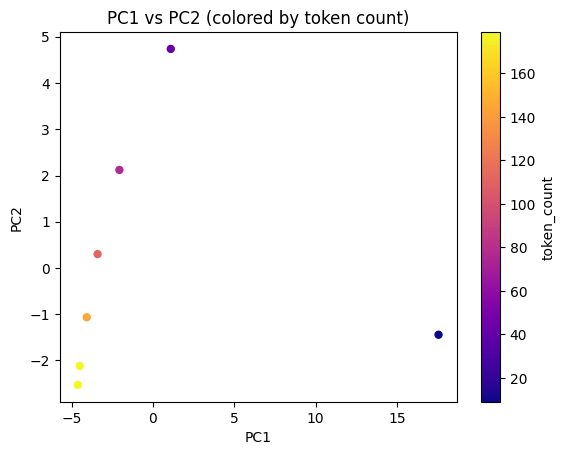

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  17.568098 -1.443865
1  activations_1.npy           43   1.096643  4.737372
2  activations_2.npy           77  -2.063603  2.120182
3  activations_3.npy          111  -3.405657  0.300273
4  activations_4.npy          145  -4.071452 -1.065832
5  activations_5.npy          179  -4.502803 -2.119171
6  activations_6.npy          179  -4.621227 -2.528959
Loaded: (7, 896) and (7, 4)
Full feature matrix: (7, 919)


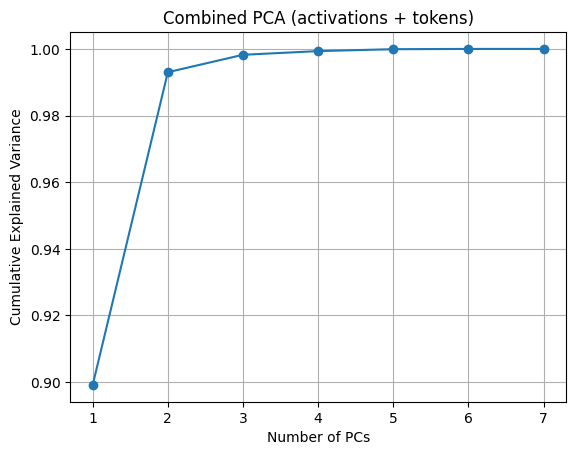

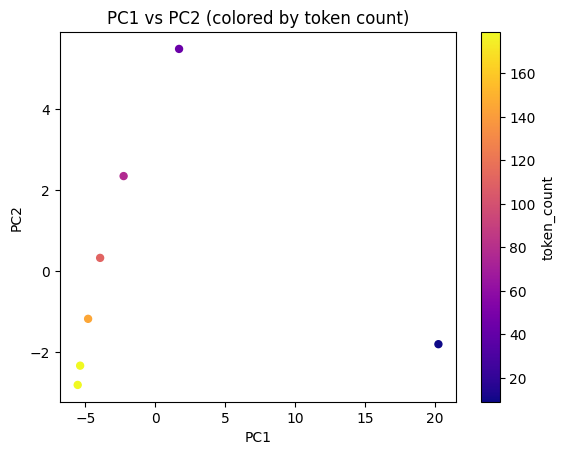

           file_name  token_count        PC1       PC2
0  activations_0.npy            9  20.229399 -1.810364
1  activations_1.npy           43   1.697504  5.486714
2  activations_2.npy           77  -2.264271  2.344022
3  activations_3.npy          111  -3.943100  0.322253
4  activations_4.npy          145  -4.801975 -1.184044
5  activations_5.npy          179  -5.371143 -2.341225
6  activations_6.npy          179  -5.546414 -2.817356


In [4]:
directories = [] 
ACT_DIR = PROJECT_ROOT / "activations/Qwen_0.5B"
for i in range(0,24):
    curr_dir = f"model_layers[{i}]_post_attention_layernorm"
    directories.append(ACT_DIR / curr_dir / "20250512_130542")

for curr_dir in directories:
    X_pool, meta_df = meta_data(curr_dir)
    mlb = MultiLabelBinarizer(sparse_output=True)
    X_tok = mlb.fit_transform(meta_df["tokens"])  # (n_samples, n_unique_tokens)

    # Combine pooled features + token indicators

    X_full = sparse.hstack([X_pool, X_tok], format="csr")
    print("Full feature matrix:", X_full.shape)  
    # (n_samples, hidden_dim + n_unique_tokens)

    # PCA on the combined matrix
    n_components = min(10, X_full.shape[0], X_full.shape[1])
    pca = PCA(n_components=n_components)
    pcs = pca.fit_transform(X_full.toarray())  # PCA needs dense input

    # Attach PC scores to metadata
    for i in range(n_components):
        meta_df[f"PC{i+1}"] = pcs[:, i]
    
    plot_PCA(meta_df, pca)